<a href="https://colab.research.google.com/github/rishabhvenkat510/FODS/blob/main/Mini_Project_FloodProbabilityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flood Probability Prediction

# Importing Libraries

In [ ]:
!pip install xgboost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error

# Loading the Dataset

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")


In [ ]:
pd.set_option('display.max_columns', None)
train

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3.0,3.0,4.0,2.0,5.0,3.0,3.0,5.0,4.0,7.0,5.0,7.0,3.0,0.445
1,1,6,7,4,4,8,8,3,5.0,4.0,6.0,9.0,7.0,2.0,0.0,3.0,5.0,3.0,3.0,4.0,3.0,0.450
2,2,6,5,6,7,3,7,1,5.0,4.0,5.0,6.0,7.0,3.0,7.0,5.0,6.0,8.0,2.0,3.0,3.0,0.530
3,3,3,4,6,5,4,8,4,7.0,6.0,8.0,5.0,2.0,4.0,7.0,4.0,4.0,6.0,5.0,7.0,5.0,0.535
4,4,5,3,2,6,4,4,3,3.0,3.0,3.0,5.0,2.0,2.0,6.0,6.0,4.0,1.0,2.0,3.0,5.0,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359002,359002,5,7,5,1,6,5,5,3.0,3.0,4.0,5.0,3.0,5.0,3.0,10.0,4.0,5.0,2.0,3.0,2.0,0.430
359003,359003,6,7,4,3,6,7,3,5.0,3.0,9.0,2.0,5.0,4.0,7.0,5.0,1.0,5.0,2.0,9.0,4.0,0.485
359004,359004,5,8,4,4,3,6,3,5.0,3.0,7.0,4.0,5.0,4.0,2.0,5.0,4.0,4.0,4.0,7.0,9.0,0.465
359005,359005,6,3,4,8,6,6,8,6.0,9.0,6.0,6.0,3.0,4.0,4.0,6.0,3.0,5.0,3.0,12.0,9.0,0.605


In [ ]:
test

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
2,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
3,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
4,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,5,4,8,3,5,4,4,5,5,5,5,6,1,3,5,6,4,4,6,6
745301,4,4,2,12,4,3,4,3,5,5,3,7,4,4,3,5,5,3,5,4
745302,5,7,9,5,5,6,7,5,5,3,6,11,3,11,4,5,9,5,5,4
745303,4,7,6,3,5,2,3,8,6,7,6,6,8,6,2,3,8,7,5,5


Information about the data

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359007 entries, 0 to 359006
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               359007 non-null  int64  
 1   MonsoonIntensity                 359007 non-null  int64  
 2   TopographyDrainage               359007 non-null  int64  
 3   RiverManagement                  359007 non-null  int64  
 4   Deforestation                    359007 non-null  int64  
 5   Urbanization                     359007 non-null  int64  
 6   ClimateChange                    359007 non-null  int64  
 7   DamsQuality                      359007 non-null  int64  
 8   Siltation                        359006 non-null  float64
 9   AgriculturalPractices            359006 non-null  float64
 10  Encroachments                    359006 non-null  float64
 11  IneffectiveDisasterPreparedness  359006 non-null  float64
 12  Dr

In [ ]:
train.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,359007.000000,359007.000000,359007.000000,359007.000000,359007.000000,359007.000000,359007.000000,359007.000000,359006.000000,359006.000000,359006.000000,359006.000000,359006.000000,359006.000000,359006.000000,359006.000000,359006.000000,359006.000000,359006.000000,359006.000000,359006.000000,359006.000000
mean,179503.000000,4.918573,4.933129,4.958146,4.944505,4.938636,4.934090,4.952745,4.927569,4.943859,4.949862,4.946597,4.943778,4.956118,4.930238,4.927422,4.926107,4.923865,4.949196,4.945720,4.938500,0.504475
std,103636.538383,2.056392,2.097164,2.070771,2.051964,2.082733,2.059331,2.085622,2.066478,2.067541,2.081057,2.076842,2.067871,2.088190,2.078610,2.084974,2.063260,2.074120,2.069444,2.079041,2.091842,0.050865
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285000
25%,89751.500000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,0.470000
50%,179503.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.505000
75%,269254.500000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,0.540000
max,359006.000000,16.000000,18.000000,16.000000,17.000000,17.000000,16.000000,16.000000,16.000000,16.000000,18.000000,16.000000,17.000000,17.000000,16.000000,16.000000,17.000000,18.000000,18.000000,16.000000,16.000000,0.725000


In [ ]:
train.isnull().sum()

,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0
Encroachments,0


In [ ]:
train.drop(columns='id', axis=1, inplace=True)
test.drop(columns='id', axis=1, inplace=True)

# EDA

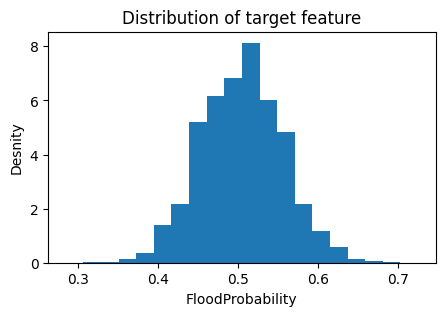

In [ ]:
plt.figure(figsize=(5,3))
plt.hist(train.FloodProbability, bins=20, density=True)
plt.title("Distribution of target feature")
plt.xlabel("FloodProbability")
plt.ylabel("Desnity")
plt.show()

# So from here we conclude that the it is following a noraml distribution with mean at 0.5

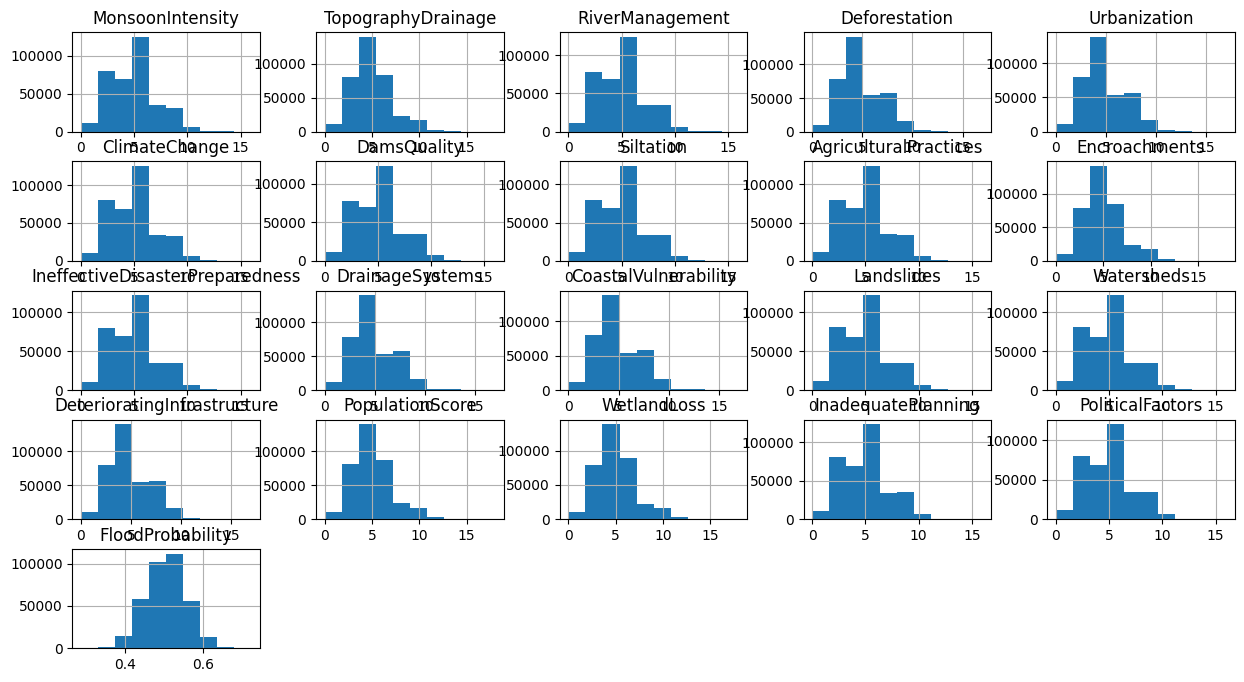

In [ ]:
train.hist(figsize=(15,8))
plt.title("Distribution of various featurs")
plt.show()

# All the distributions are right Skewed distributions

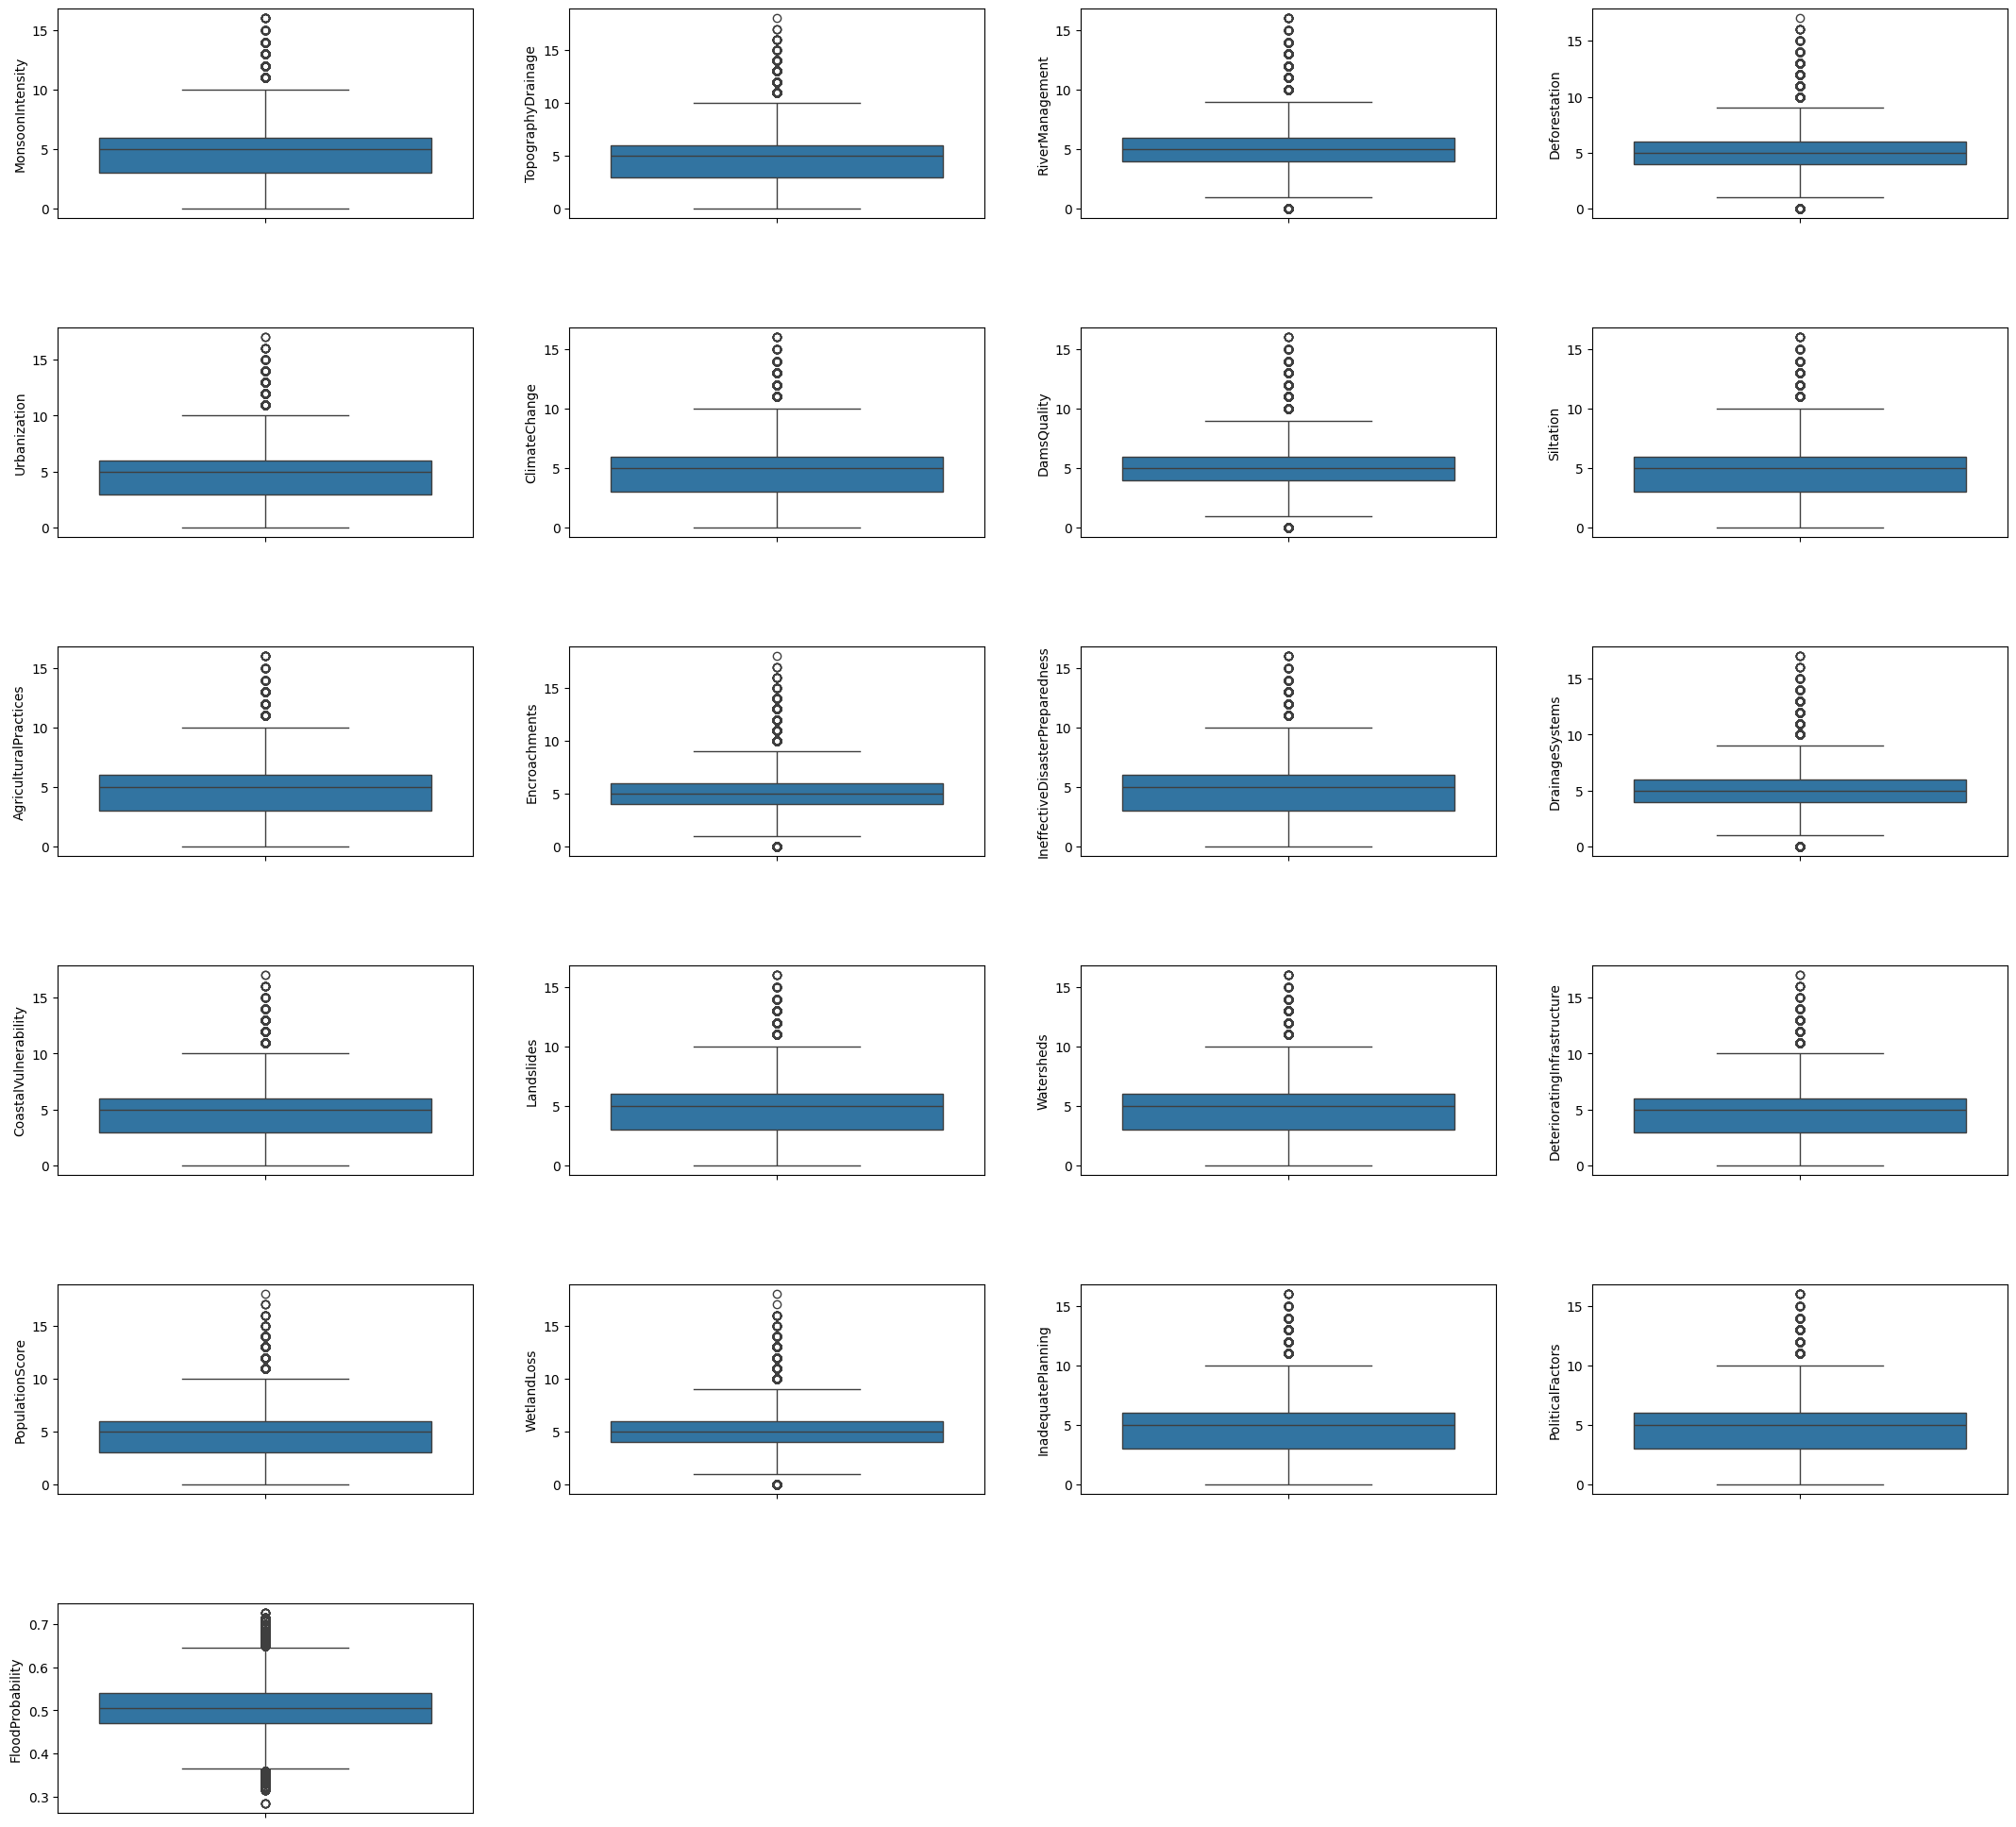

In [ ]:
#Boxplot
fig, axs = plt.subplots(ncols=4, nrows=6, figsize=(22, 20))
index = 0
axs = axs.flatten()
for k,v in train.select_dtypes(include=[np.number]).items():
    sns.boxplot(y=k, data=train, ax=axs[index])
    index += 1

# Hide any empty subplots
for ax in axs[index:]:
    fig.delaxes(ax)
plt.tight_layout(pad=3, w_pad=4, h_pad=8.0)

In [ ]:
data_replaced = train.copy()
for col in data_replaced:
  q1=data_replaced[col].quantile(0.25)
  q3=data_replaced[col].quantile(0.75)
  iqr = q3 - q1
  data_replaced.loc[(data_replaced[col] < q1 - 1.5*iqr), col] = q1 - 1.5*iqr
  data_replaced.loc[(data_replaced[col] > q3 + 1.5*iqr), col] = q3 + 1.5*iqr

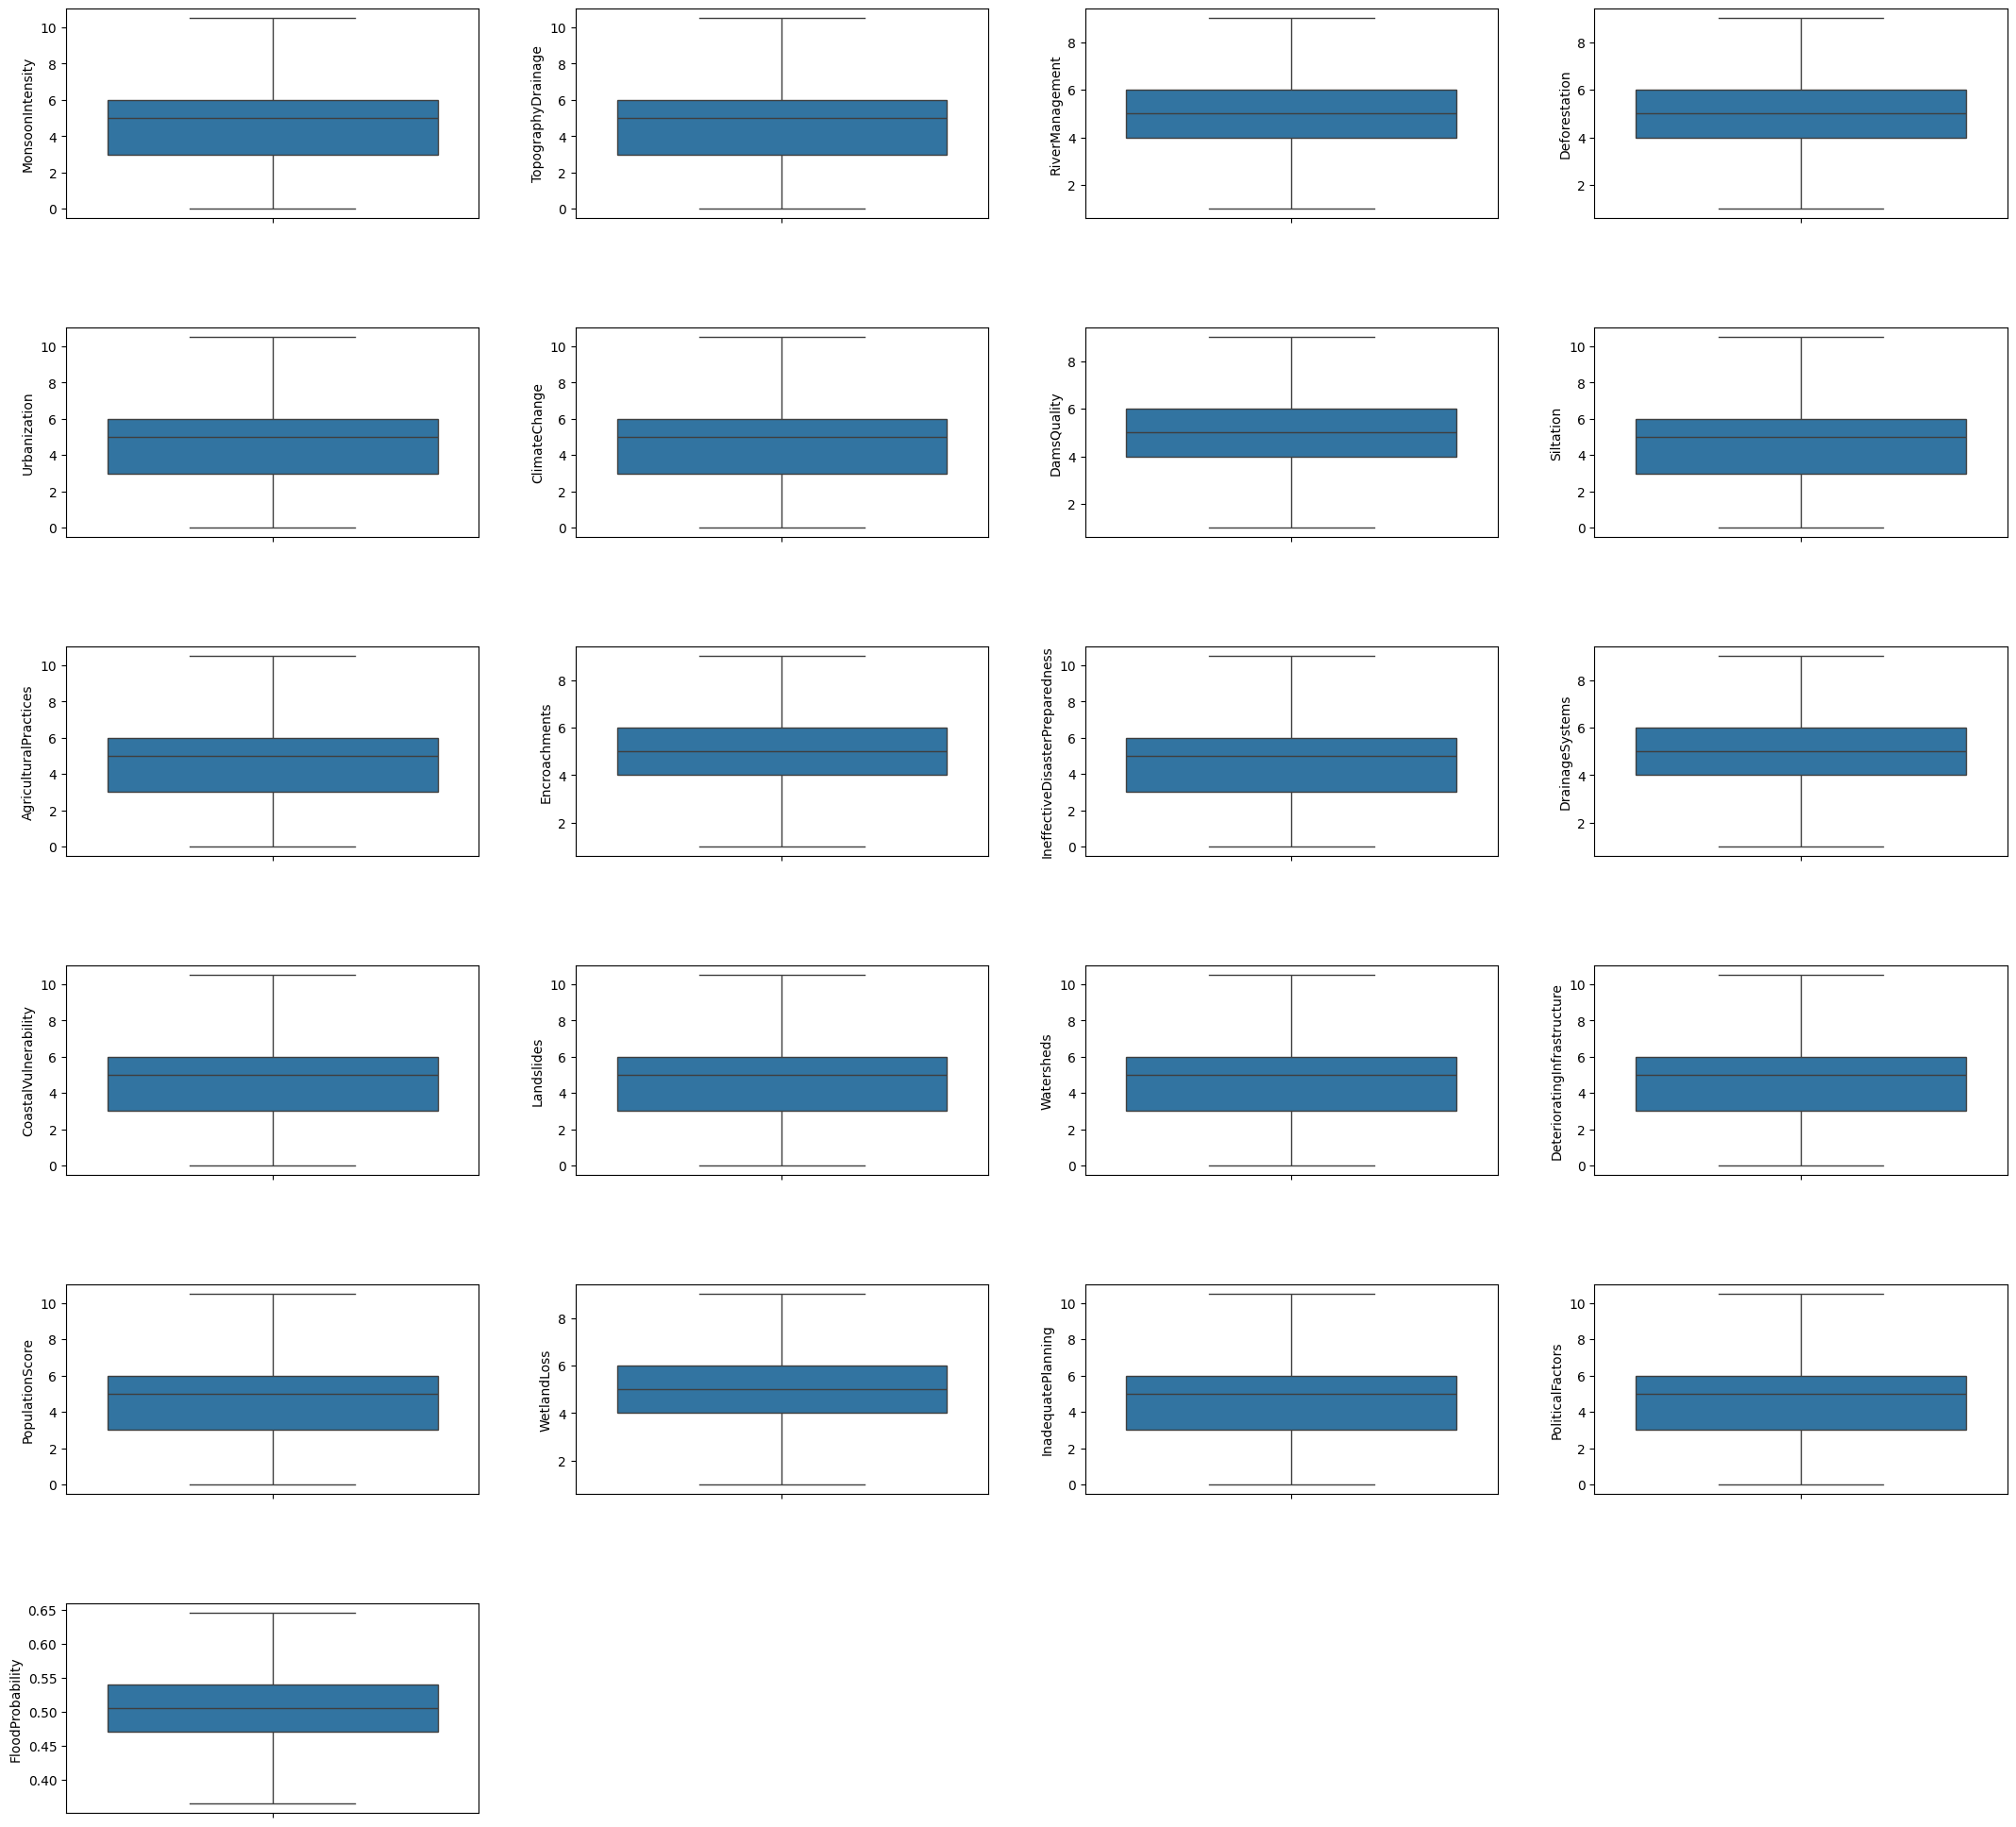

In [ ]:
#Boxplot
fig, axs = plt.subplots(ncols=4, nrows=6, figsize=(22, 20))
index = 0
axs = axs.flatten()
for k,v in train.select_dtypes(include=[np.number]).items():
    sns.boxplot(y=k, data=data_replaced, ax=axs[index])
    index += 1

# Hide any empty subplots
for ax in axs[index:]:
    fig.delaxes(ax)
plt.tight_layout(pad=3, w_pad=4, h_pad=8.0)

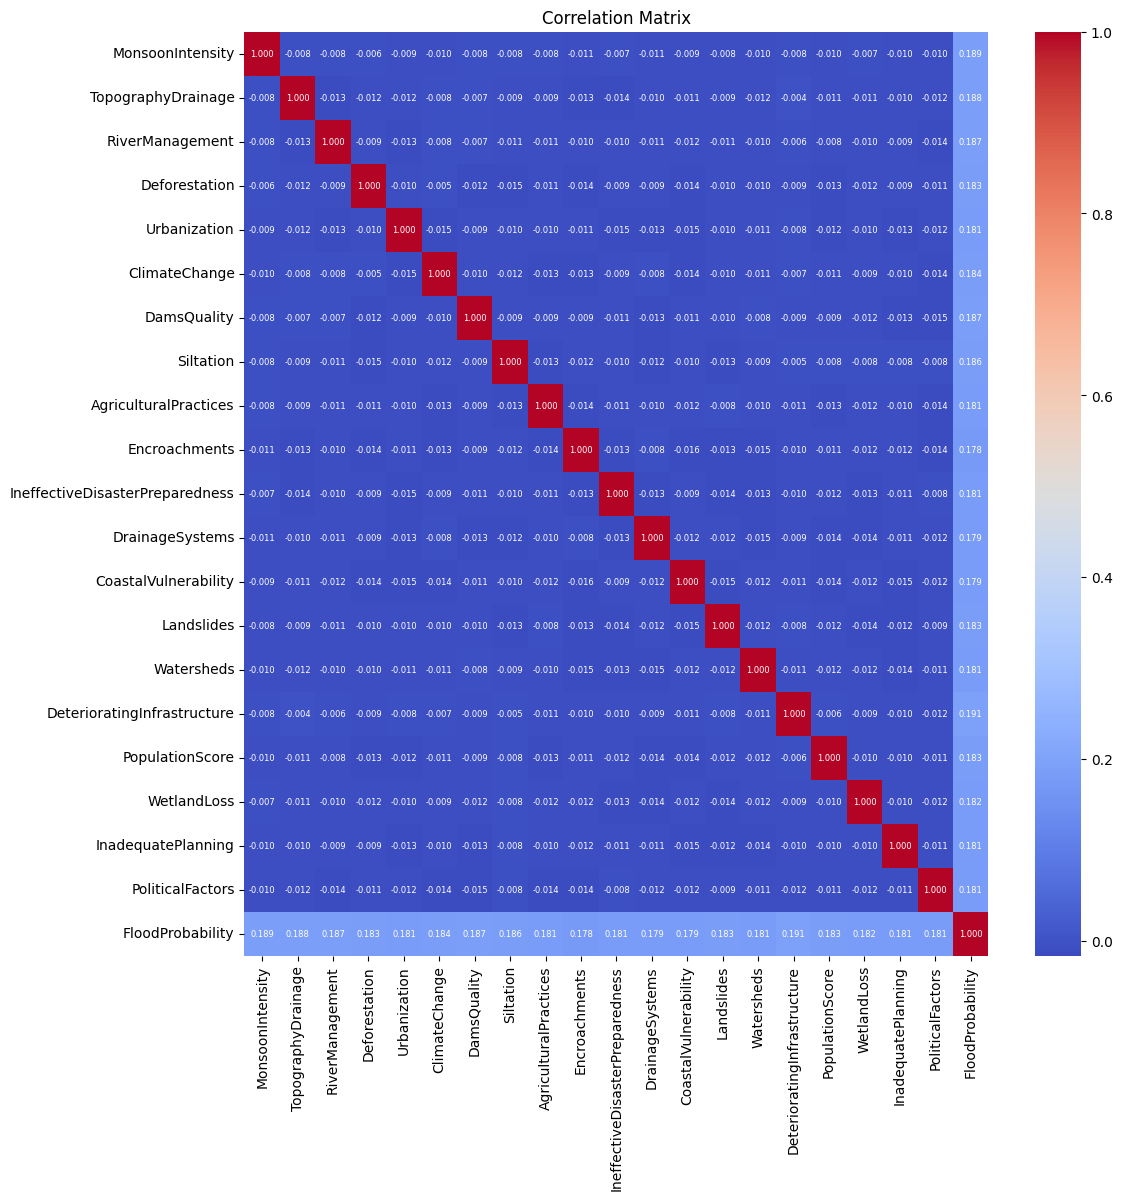

In [ ]:
plt.figure(figsize=(12,12))
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', annot_kws={"size": 6})
plt.title('Correlation Matrix')
plt.show()

# From the correlation matrix we observe that there are no corelation among the features
# but are only correlated with the target variable

<Figure size 1100x1000 with 0 Axes>

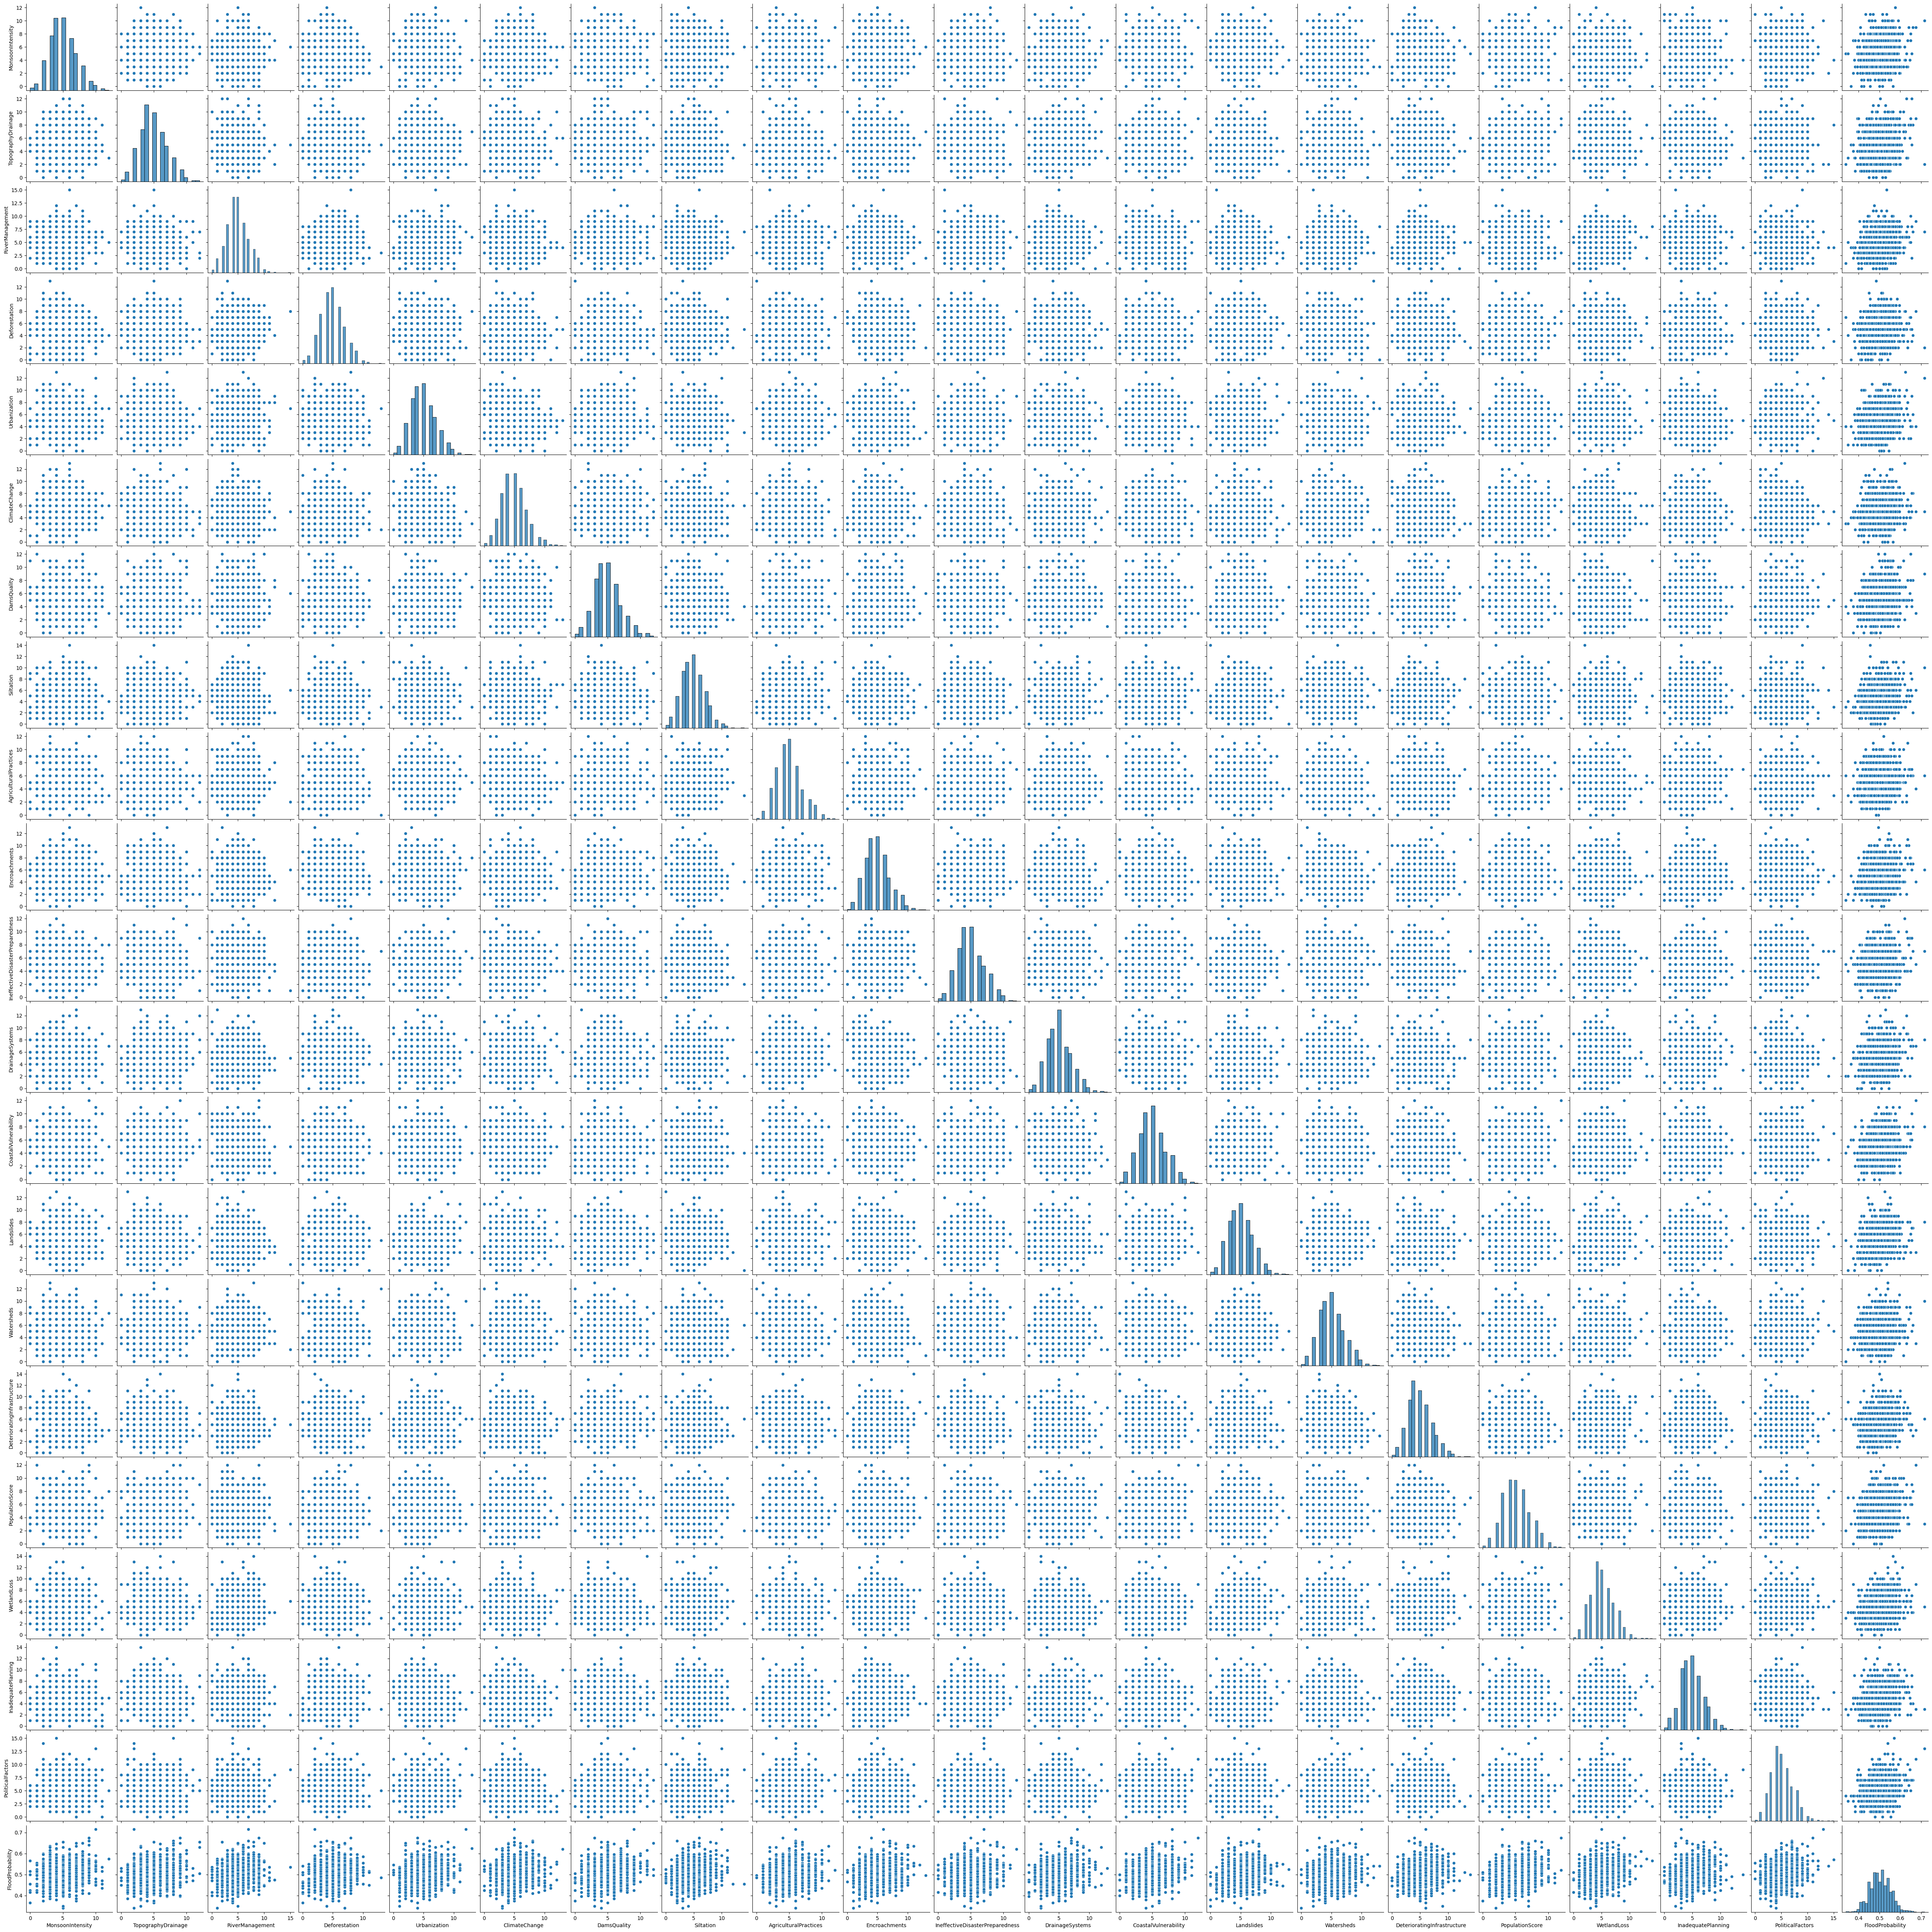

In [ ]:
df1 = train[:1000]
train = train.dropna()
plt.figure(figsize=(11,10))
sns.pairplot(data=df1)
plt.show()

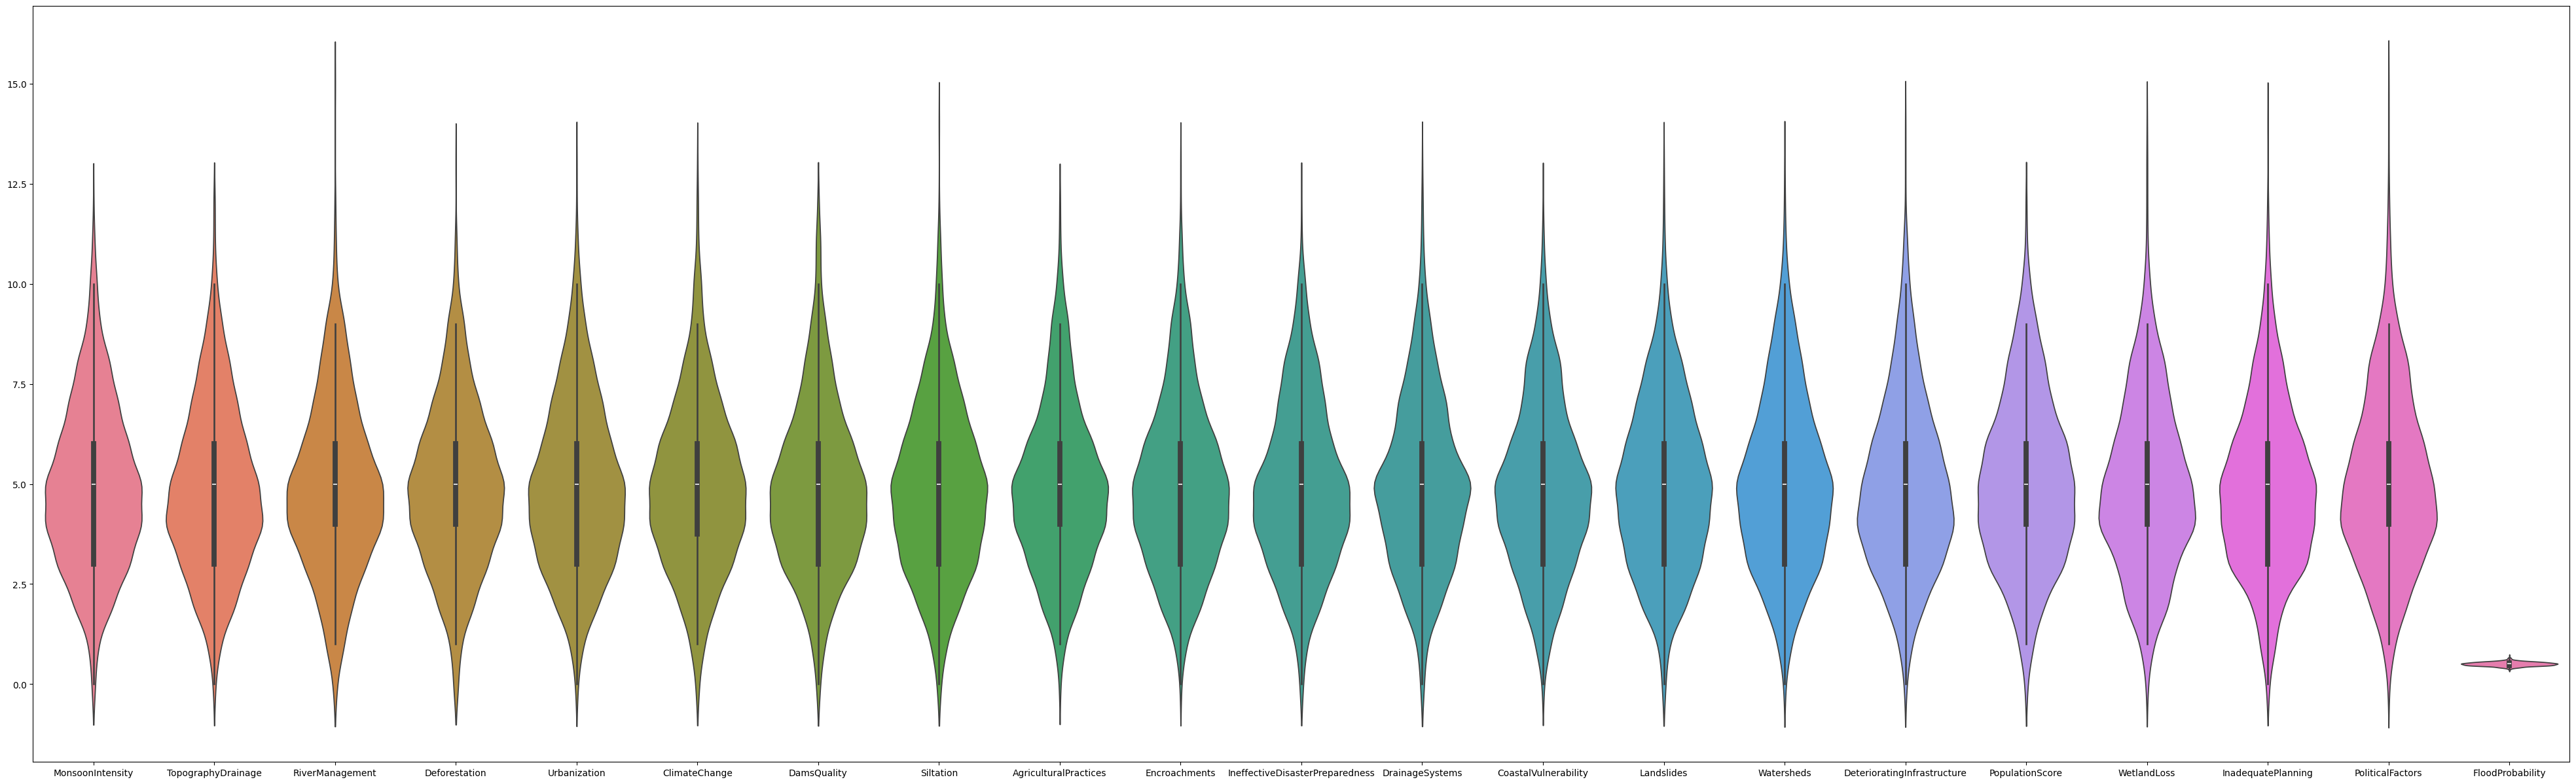

In [ ]:
plt.figure(figsize=(50,15))
sns.violinplot(data=df1)
plt.show()

# Splitting The Dataset

In [ ]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)


# Model Training

In [ ]:
models = {
    "linear Reg" : LinearRegression(),
    "Ridge" : Ridge(),
    "Lasso" : Lasso(),
    "ElasticNet" : ElasticNet(),
    "SVM" : SVR(),
    "Decision Tree" : DecisionTreeRegressor(),
}

In [ ]:
def train_regressor(reg,X_train,y_train,X_test,y_test):
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    roc = r2_score(y_test, y_pred)
    return roc

In [ ]:
r2_scores = []
for name,reg in models.items():
    current_r2 = train_regressor(reg, X_train, y_train, X_test, y_test)
    print("Name: ", name)
    print("R2 Score: ", current_r2)
    r2_scores.append(current_r2)

Name:  linear Reg
R2 Score:  0.8451540419888744
Name:  Ridge
R2 Score:  0.8451540385552079
Name:  Lasso
R2 Score:  -1.1252125091010257e-05
Name:  ElasticNet
R2 Score:  -1.1252125091010257e-05
Name:  SVM
R2 Score:  0.693429354624695
Name:  Decision Tree
R2 Score:  -0.004640961061554982


In [ ]:
performance_df = pd.DataFrame({'Algorithm': models.keys(), 'R2_score':r2_scores})
performance_df

,Algorithm,R2_score
0,linear Reg,0.845154
1,Ridge,0.845154
2,Lasso,-0.000011
3,ElasticNet,-0.000011
4,SVM,0.693429
5,Decision Tree,-0.004641


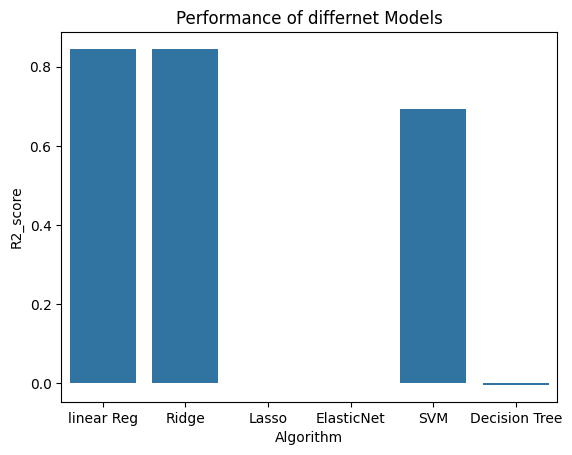

In [ ]:
sns.barplot(x=performance_df['Algorithm'], y=performance_df['R2_score'])
plt.title("Performance of differnet Models")
plt.show()

In [ ]:
model = Ridge()

In [ ]:
params = {
    'alpha' : [0.1,1],
    'fit_intercept' : [True, False],
    'solver' : ['auto','sag','saga'],
}

In [ ]:
grid = GridSearchCV(model,params,scoring='neg_mean_absolute_error',n_jobs=-1,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1], 'fit_intercept': [True, False],
                         'solver': ['auto', 'sag', 'saga']},
             scoring='neg_mean_absolute_error')

In [ ]:
grid.best_params_

{'alpha': 0.1, 'fit_intercept': True, 'solver': 'saga'}

In [ ]:
Predictions = grid.predict(test)
Predictions.shape

(745305,)

In [ ]:
test.shape

(745305, 20)

In [ ]:
Predictions


array([0.57343629, 0.45526656, 0.45475106, ..., 0.62426101, 0.55101824,
       0.51158382])